# Projeção de dados alguns dados não sei ainda

## Inicializando variáveis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import statsmodels.api as sm
from multidata import *

In [2]:
%run ../Limpezas/limpeza_análise_energética.ipynb

In [3]:
df = MultiData(dict_analise_energetica)

## Análise e projeção de produção de energia primária

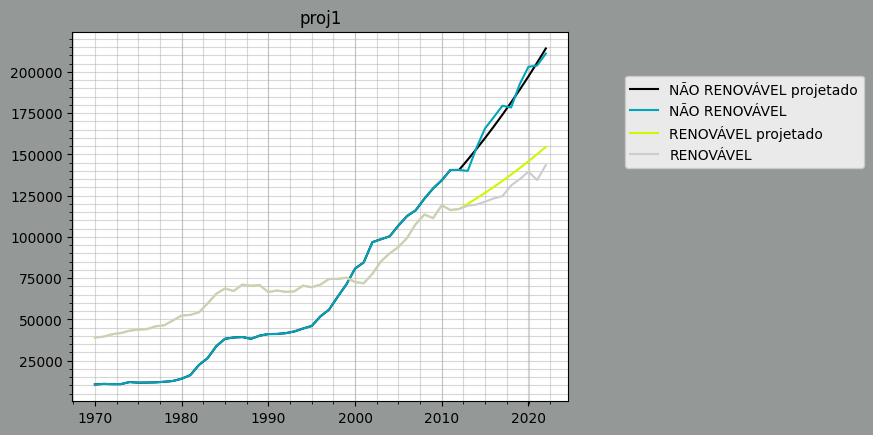

In [4]:
proj1 = df.Projection.VAR(2012, [(0, 'NÃO RENOVÁVEL'),
                               (0, 'RENOVÁVEL')],
                               'Geração de energia renovável vs não renovável')
df.add_dataframe(proj1, 'proj1')
df.Plotting.autoplot('proj1')

### Este modelo conseguiu prever bem os valores da energia não renovável, mas não tão bem os valores da energia renovável

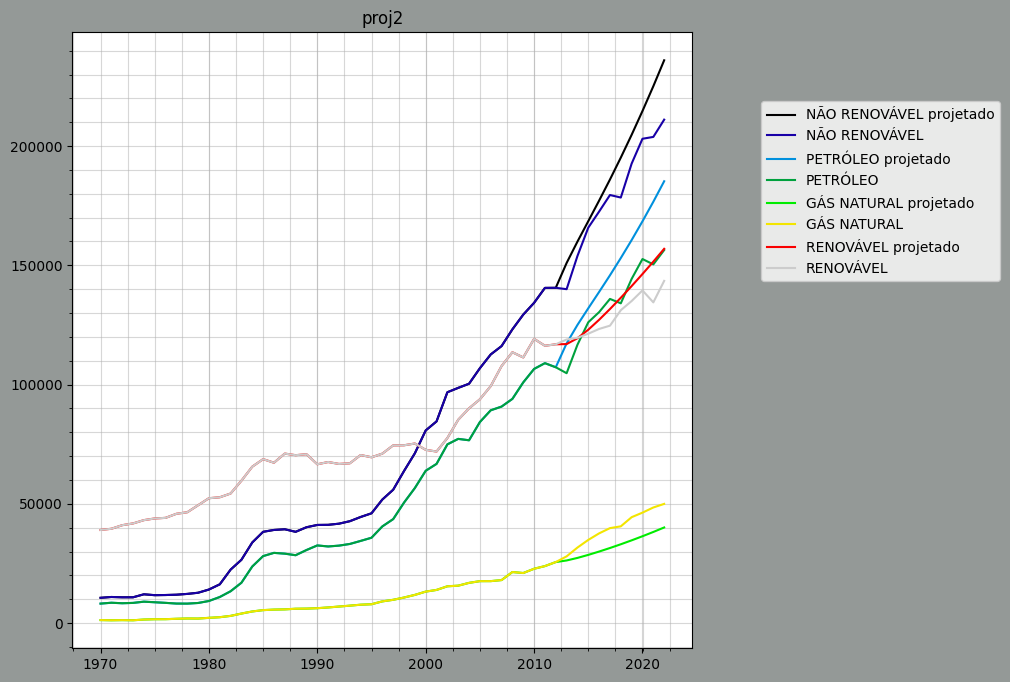

In [5]:
proj2 = df.Projection.VAR(2012, [(0, 'NÃO RENOVÁVEL'),
                               (0, 'PETRÓLEO'),
                               (0, 'GÁS NATURAL'),
                               (0, 'RENOVÁVEL'),
                               ],
                               'Geração de energia por fonte')
df.add_dataframe(proj2, 'proj2')
df.Plotting.autoplot('proj2')

### Esse modelo se saiu aparentemente pior nas projeções que estávamos tentando anteriormente, mas para ter certeza, podemos comparar utilizando a métrica MSE (Mean Squared Error)

In [6]:
errors = df.Projection.errordiff('proj1', 'proj2')
for error in errors:
    print(error)

NÃO RENOVÁVEL: Modelo 1 é 8.871745771972511 vezes mais preciso
RENOVÁVEL: Modelo 2 é 1.024255592936364 vezes mais preciso


### Infelizmente, a segunda projeção não foi tão boa quanto a primeira, mas faz sentido, já que boa parte das variações ocorrem de uma forma imprevisível, e com variáveis que não estão contidas no modelo, então não é uma conclusão tão significativa

### Projeção futura

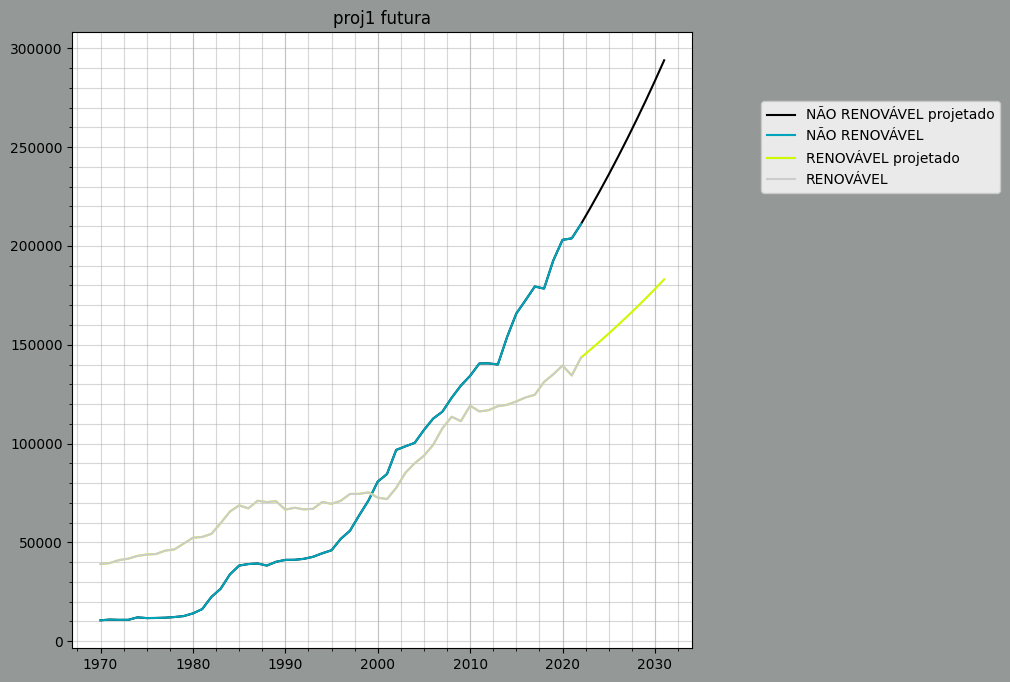

In [7]:
proj1_futura = df.Projection.VAR(2032, [(0, 'NÃO RENOVÁVEL'),
                               (0, 'RENOVÁVEL')],
                               'Geração de energia renovável vs não renovável')
df.add_dataframe(proj1_futura, 'proj1_futura')
df.Plotting.autoplot('proj1_futura')

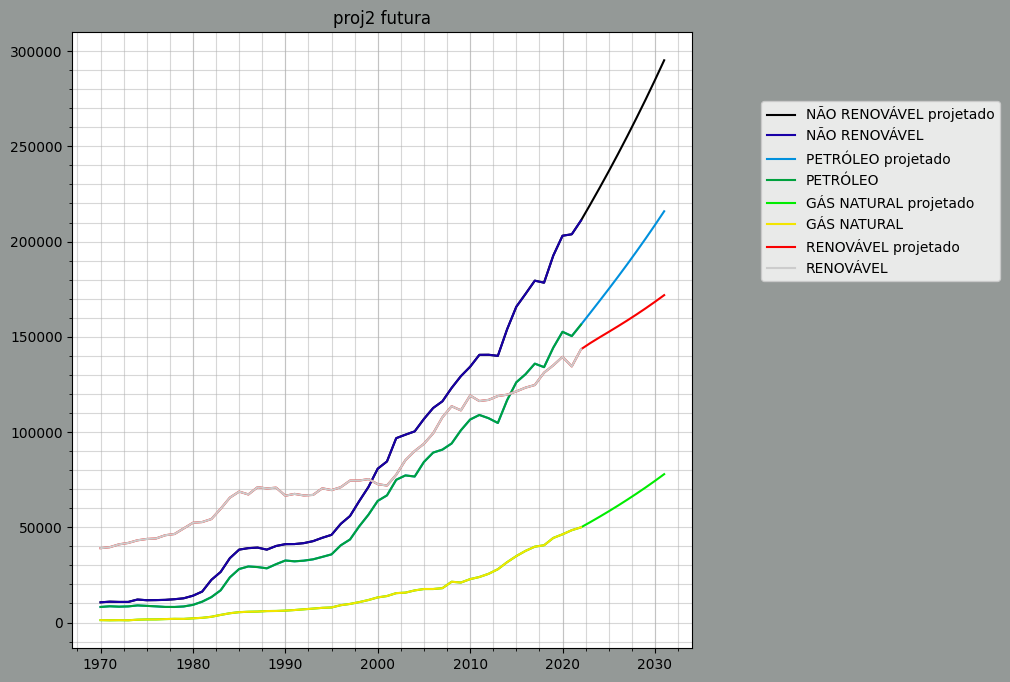

In [8]:
proj2_futura = df.Projection.VAR(2032, [(0, 'NÃO RENOVÁVEL'),
                               (0, 'PETRÓLEO'),
                               (0, 'GÁS NATURAL'),
                               (0, 'RENOVÁVEL'),
                               ],
                               'Geração de energia por fonte')
df.add_dataframe(proj2_futura, 'proj2_futura')
df.Plotting.autoplot('proj2_futura')

### As projeções de energia não renovável e energia renovável parecem praticamente iguais, e ambos os modelos parecem esperar que todas as variáveis continuem em alta

## Análise e projeção de consumo interno por setor

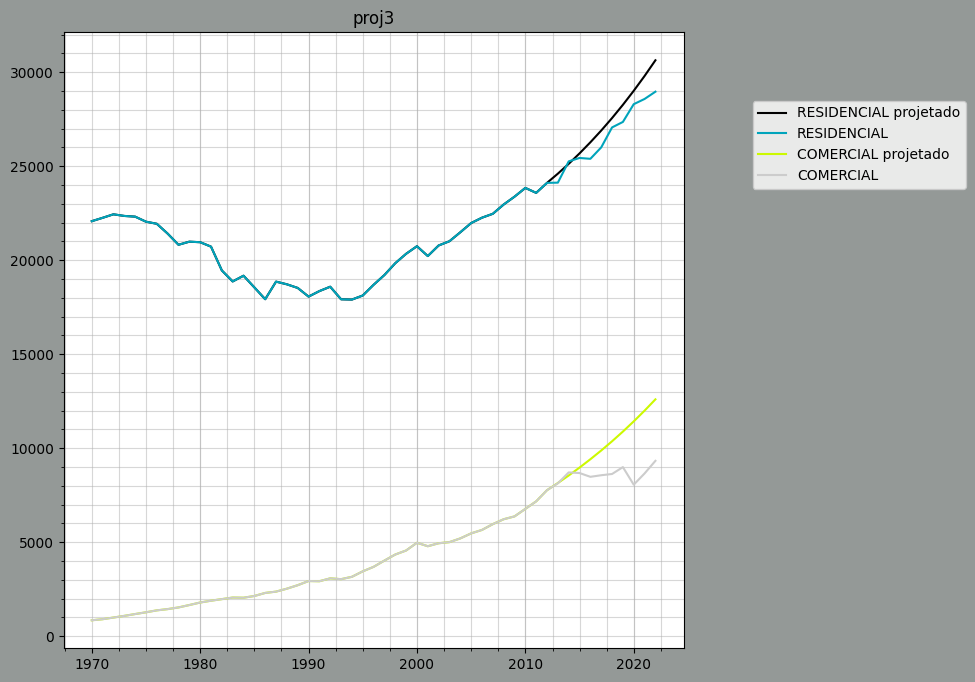

In [9]:
proj3 = df.Projection.VAR(2012, [(6, 'RESIDENCIAL'),
                                 (6, 'COMERCIAL'),],
                                 'Projeção de consumo residencial e comercial')
df.add_dataframe(proj3, 'proj3')
df.Plotting.autoplot('proj3')

### A projeção seguiu proximamente os valores esperados para ambos, mas talvez possa ficar ainda melhor com a adição de outras variáveis

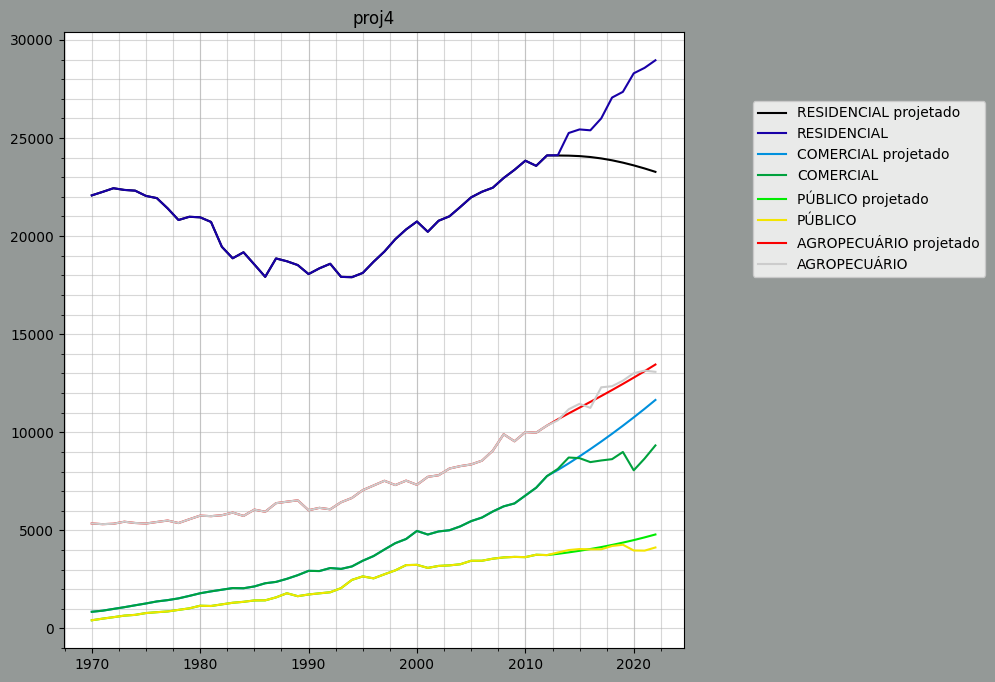

In [10]:
proj4 = df.Projection.VAR(2012, [(6, 'RESIDENCIAL'),
                               (6, 'COMERCIAL'),
                               (6, 'PÚBLICO'),
                               (6, 'AGROPECUÁRIO')],
                               'Projeção de consumo residencial e comercial')
df.add_dataframe(proj4, 'proj4')
df.Plotting.autoplot('proj4')

### A projeção de consumo residencial foi pra um caminho bastante inesperado, mas o de consumo comercial parece continuar igual. Vamos comparar exatamente as diferenças:

In [11]:
errors2 = df.Projection.errordiff('proj3', 'proj4')
for error in errors2:
    print(error)

RESIDENCIAL: Modelo 1 é 14.599459330978428 vezes mais preciso
COMERCIAL: Modelo 2 é 1.7689564447064698 vezes mais preciso


### Como observado, o modelo 1 foi 14 vezes melhor prevendo o consumo residencial, mas no comercial, o modelo 2 foi um pouco melhor

### Apesar de o modelo não apresentar resultados significativos, ainda podemos tentar fazer uma projeção

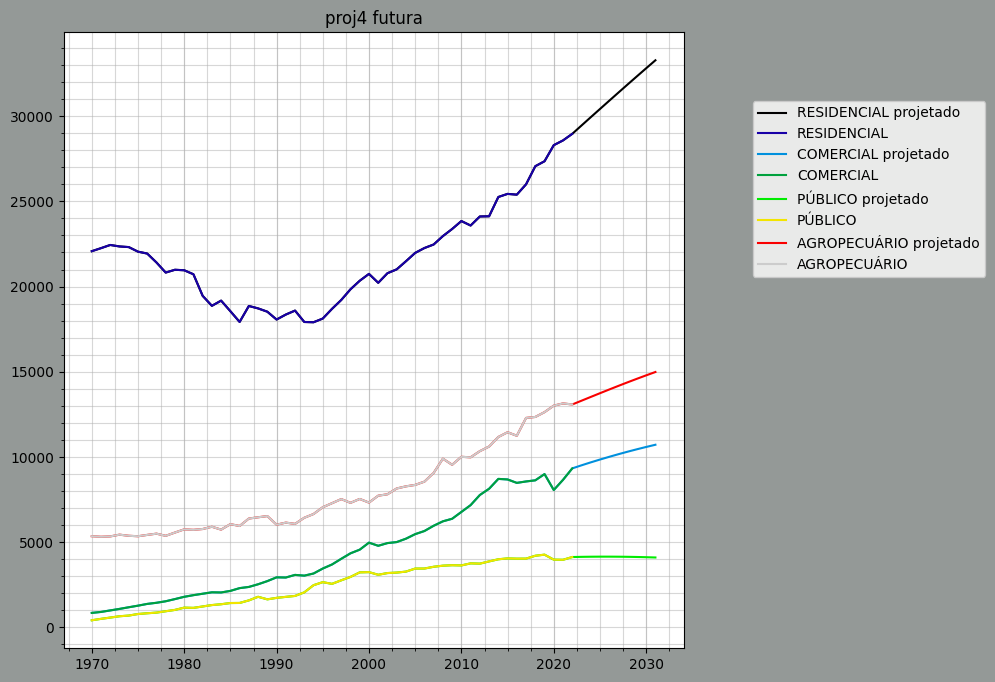

In [12]:
proj4_futura = df.Projection.VAR(2032,
                  [(6, 'RESIDENCIAL'),
                   (6, 'COMERCIAL'),
                   (6, 'PÚBLICO'),
                   (6, 'AGROPECUÁRIO')],
                   'Projeção de consumo residencial e comercial')
df.add_dataframe(proj4_futura, 'proj4_futura')
df.Plotting.autoplot('proj4_futura')

### Não parece apresentar nenhum movimento absurdo, mas a precisão do modelo ainda é questionável.
### Ainda assim, ele indica uma estagnação no consumo público, e uma alta consistente no consumo residencial

## Análise e projeção da oferta interna de energia

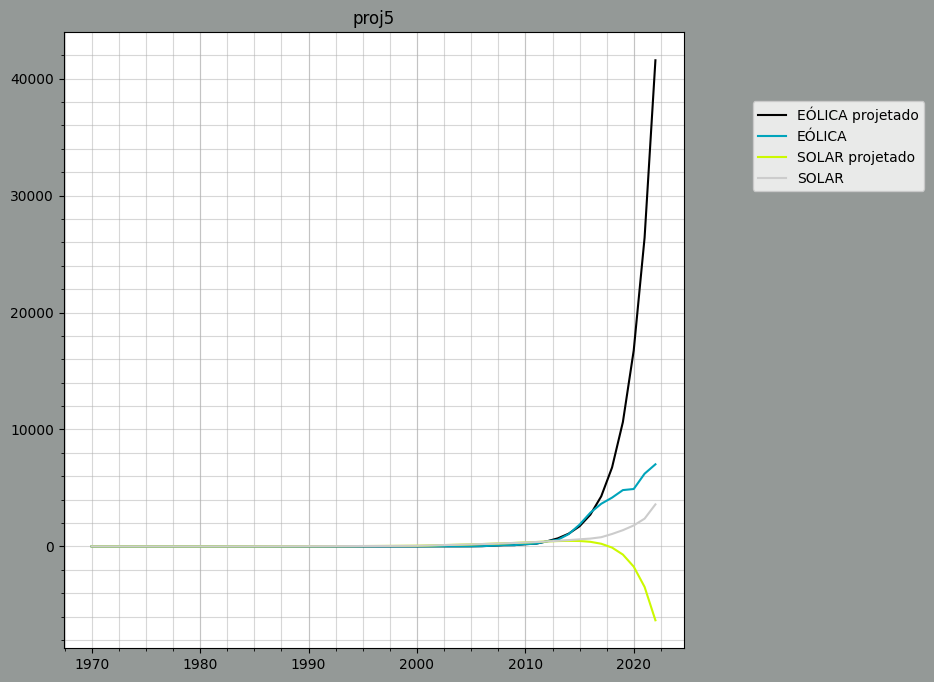

In [13]:
proj5 = df.Projection.VAR(2012, [(2, 'EÓLICA'),
                               (2, 'SOLAR')],
                               'Projeção de consumo residencial e comercial')
df.add_dataframe(proj5, 'proj5')
df.Plotting.autoplot('proj5')

##### Ambas as projeções estão fora por muito, pois o crescimento das fontes renováveis foi algo repentino. Talvez com algumas outras variáveis seja possível elaborar um modelo melhor.

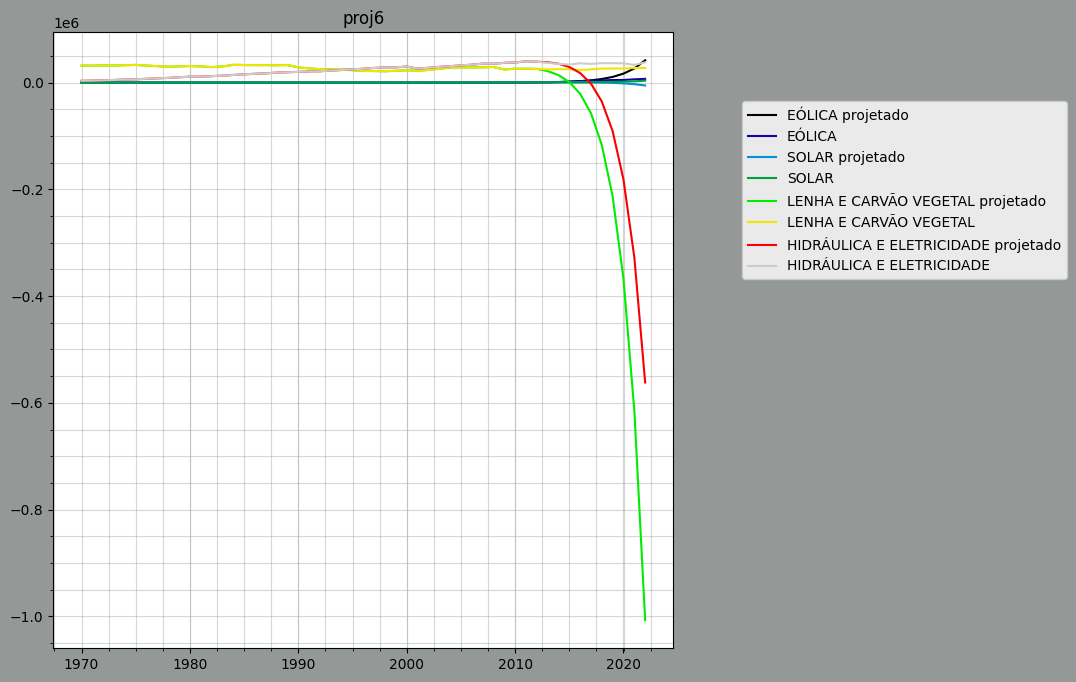

In [14]:
proj6 = df.Projection.VAR(2012, [(2, 'EÓLICA'),
                               (2, 'SOLAR'),
                               (2, 'LENHA E CARVÃO VEGETAL'),
                               (2, 'HIDRÁULICA E ELETRICIDADE')],
                               'Projeção de consumo residencial e comercial')
df.add_dataframe(proj6, 'proj6')
df.Plotting.autoplot('proj6')

KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK

### Infelizmente, o modelo continua apresentando péssimos resultados, então não vale a pena tentar utilizá-lo para tentar uma projeção futura